In [67]:
# Importing the Dataset

import pandas as pd
data=pd.read_csv('Marks.csv')
#data.drop('Unnamed: 0',axis=1,inplace=True)
data

,StudentID,Name,Maths,Science,English,Social,Total,Gender
0,1,Alice,78,85,82,80,325,Female
1,2,Bob,88,79,94,90,351,Male
2,3,Charlie,67,72,70,68,277,Male
3,4,Diana,92,95,93,97,377,Female
4,5,Ethan,56,60,58,65,239,Male
5,6,Faith,85,83,88,87,343,Female
6,7,George,75,78,72,74,299,Female


In [68]:
#Checking For Duplicates

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [69]:
#Drop Duplicates

data.drop_duplicates(inplace=True)

In [70]:
# Fill ing Null Calues With 0

data.fillna(0,inplace=True)

In [71]:
# First 10 Students

data.head(10)

,StudentID,Name,Maths,Science,English,Social,Total,Gender
0,1,Alice,78,85,82,80,325,Female
1,2,Bob,88,79,94,90,351,Male
2,3,Charlie,67,72,70,68,277,Male
3,4,Diana,92,95,93,97,377,Female
4,5,Ethan,56,60,58,65,239,Male
5,6,Faith,85,83,88,87,343,Female
6,7,George,75,78,72,74,299,Female


In [72]:
# Female Students

data[data['Gender']=='FEMALE']

,StudentID,Name,Maths,Science,English,Social,Total,Gender


In [73]:
# Display S1 Marks

data['Maths']

0    78
1    88
2    67
3    92
4    56
5    85
6    75
Name: Maths, dtype: int64

In [74]:
# Display S2 Marks and Female

data[data['Gender'] == "FEMALE"]['Science']


Series([], Name: Science, dtype: int64)

In [75]:
# Display Male students  and S1 Marks in Ascending Order

data[data['Gender']=="MALE"].Maths.sort_values()

Series([], Name: Maths, dtype: int64)

In [76]:
# Display Student Name Staring With S

for i in data['Name']:
  if i[0]=='S':
    print(i)

In [77]:
# Display Student Name Ending With N

for i in data['Name']:
  if i[-1]=='N':
    print(i)

In [78]:
#Total Marks of Students Under Total Marks Column

data['Total_Marks'] = data['Maths'] + data['Science'] + data['English'] + data['Social']
datax = data[['Name', 'Total_Marks']]
datax


,Name,Total_Marks
0,Alice,325
1,Bob,351
2,Charlie,277
3,Diana,377
4,Ethan,239
5,Faith,343
6,George,299


In [79]:
# Display Total Marks of Female Students

data[data['Gender']=='FEMALE'].Total_Marks

Series([], Name: Total_Marks, dtype: int64)

In [80]:
# Percentage of each Student under Percentage Column

data['Percentage']=data['Total_Marks']/90*100
data['Percentage'].astype('int')

0    361
1    390
2    307
3    418
4    265
5    381
6    332
Name: Percentage, dtype: int64

In [81]:
# Grading The Student marks bases on Percentage

data.loc[data['Percentage']<40,['Grade']]='F'
data.loc[(data['Percentage']<100) & (data['Percentage']>=80),['Grade']]='A'
data.loc[(data['Percentage']<80) & (data['Percentage']>=60),['Grade']]='B'
data.loc[(data['Percentage']<60) & (data['Percentage']>=40),['Grade']]='C'
data

,StudentID,Name,Maths,Science,English,Social,Total,Gender,Total_Marks,Percentage,Grade
0,1,Alice,78,85,82,80,325,Female,325,361.111111,NaN
1,2,Bob,88,79,94,90,351,Male,351,390.000000,NaN
2,3,Charlie,67,72,70,68,277,Male,277,307.777778,NaN
3,4,Diana,92,95,93,97,377,Female,377,418.888889,NaN
4,5,Ethan,56,60,58,65,239,Male,239,265.555556,NaN
5,6,Faith,85,83,88,87,343,Female,343,381.111111,NaN
6,7,George,75,78,72,74,299,Female,299,332.222222,NaN


In [82]:
# Converting final File to CSV

data.to_csv('Marks_Final.csv')

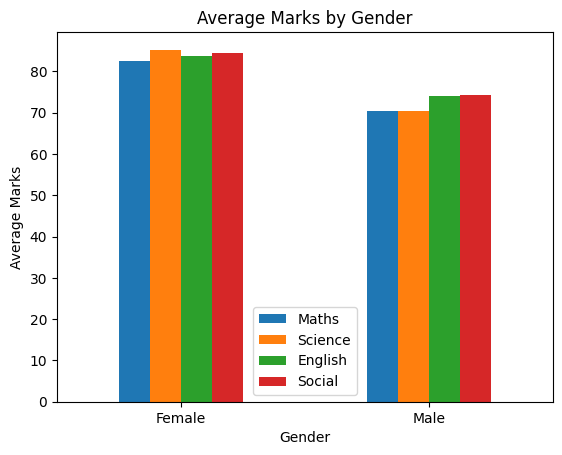

In [83]:
# Bar Chart To show the Percentage of Female and Male in Class

import matplotlib.pyplot as plt

avg_marks_by_gender = data.groupby('Gender')[['Maths', 'Science', 'English', 'Social']].mean()
avg_marks_by_gender.plot(kind='bar')
plt.title("Average Marks by Gender")
plt.ylabel("Average Marks")
plt.xticks(rotation=0)
plt.show()


In [84]:
data['Grade'] = ['F' if total < 250 else 'P' for total in data['Total']]


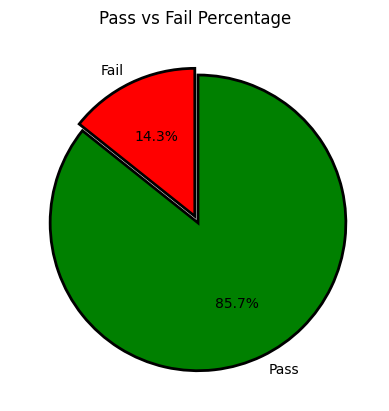

In [85]:
pass_count = [len(data[data['Grade'] == 'F']), len(data[data['Grade'] != 'F'])]
category = ['Fail', 'Pass']
colors = ['red', 'green']
explode = [0, 0.05]

plt.pie(pass_count, labels=category, explode=explode, startangle=90,
        colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title("Pass vs Fail Percentage")
plt.show()
